# Sentiment Analysis using NLP and Machine Learning

## Project Overview
This notebook performs **Sentiment Analysis on Airline Reviews** using Natural Language Processing (NLP) and Machine Learning algorithms.

### What is Sentiment Analysis?
Sentiment Analysis is a technique to automatically determine the emotional tone behind text. We will:
- Analyze airline customer reviews (text data)
- Classify sentiments into categories (positive, neutral, negative)
- Compare multiple ML algorithms to find the best model

### Pipeline:
1. **Data Loading & Exploration** 📊
2. **Text Preprocessing** 🧹 (Cleaning, Stopwords Removal, Lemmatization)
3. **Feature Extraction** 🔤 (TF-IDF Vectorization)
4. **Model Training** 🤖 (Logistic Regression, Naive Bayes, SVM)
5. **Model Evaluation** 📈 (Accuracy, Confusion Matrix, Classification Report)
6. **Prediction System** 💬 (Interactive predictions)

## 1. Import Required Libraries

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import string

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download required NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Select only the required columns
df = df[['airline_sentiment', 'text']]

print("📊 Dataset loaded successfully!\n")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")
print(f"\nColumns: {list(df.columns)}")

📊 Dataset loaded successfully!

Dataset Shape: (14640, 2)
Total Records: 14640

Columns: ['airline_sentiment', 'text']


In [3]:
# Display first few rows
print("\n📋 First 5 rows of the dataset:\n")
df.head()


📋 First 5 rows of the dataset:



,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [4]:
# Dataset information
print("\nℹ️ Dataset Information:\n")
df.info()


ℹ️ Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [5]:
# Check for missing values
print("\n🔍 Missing Values:\n")
print(df.isnull().sum())

# Drop any missing values
df = df.dropna()
print(f"\n✅ After removing missing values: {len(df)} records")


🔍 Missing Values:

airline_sentiment    0
text                 0
dtype: int64

✅ After removing missing values: 14640 records


In [6]:
# Check sentiment distribution
print("\n📊 Sentiment Distribution:\n")
print(df['airline_sentiment'].value_counts())
print(f"\nPercentage Distribution:\n")
print(df['airline_sentiment'].value_counts(normalize=True) * 100)


📊 Sentiment Distribution:

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Percentage Distribution:

airline_sentiment
negative    62.691257
neutral     21.168033
positive    16.140710
Name: proportion, dtype: float64


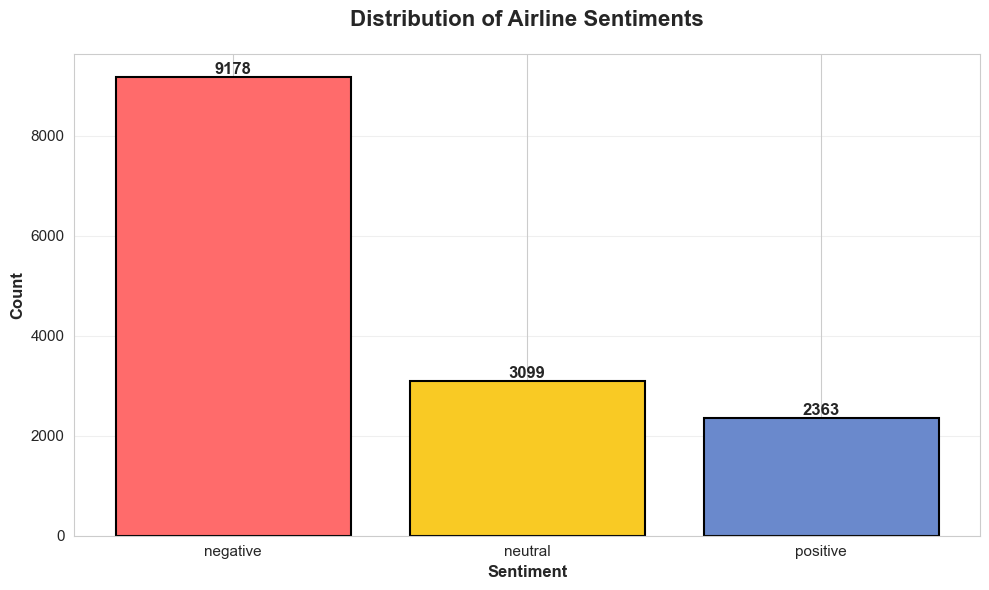

In [7]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts = df['airline_sentiment'].value_counts()
colors = ['#ff6b6b', '#f9ca24', '#6a89cc']
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, edgecolor='black', linewidth=1.5)

plt.title('Distribution of Airline Sentiments', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Text Preprocessing

### NLP Preprocessing Steps:
1. **Lowercasing**: Convert text to lowercase
2. **Remove URLs**: Remove web links
3. **Remove Special Characters**: Keep only letters and spaces
4. **Remove Stopwords**: Filter common words (the, is, at, etc.)
5. **Lemmatization**: Convert words to base form (running → run)

In [8]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    
    Args:
        text (str): Raw text to preprocess
    
    Returns:
        str: Cleaned and preprocessed text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join back to string
    return ' '.join(tokens)

print("✅ Text preprocessing function created!")

✅ Text preprocessing function created!


In [9]:
# Example of preprocessing
sample_text = df['text'].iloc[0]
print("📝 Original Text:")
print(sample_text)
print("\n🧹 Preprocessed Text:")
print(preprocess_text(sample_text))

📝 Original Text:
@VirginAmerica What @dhepburn said.

🧹 Preprocessed Text:
said


In [10]:
# Apply preprocessing to all texts
print("🔄 Preprocessing all texts... This may take a moment...\n")
df['cleaned_text'] = df['text'].apply(preprocess_text)
print("✅ Text preprocessing completed!")

# Display sample
print("\n📋 Sample of original vs cleaned text:\n")
df[['text', 'cleaned_text']].head(3)

🔄 Preprocessing all texts... This may take a moment...

✅ Text preprocessing completed!

📋 Sample of original vs cleaned text:



,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip


## 4. Feature Extraction using TF-IDF

**TF-IDF (Term Frequency-Inverse Document Frequency)** converts text into numerical features:
- **TF**: How frequently a term appears in a document
- **IDF**: How important a term is across all documents
- Assigns higher weights to important, unique words

In [11]:
# Prepare features and target
X = df['cleaned_text']
y = df['airline_sentiment']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nSentiment classes: {y.unique()}")

Features (X): (14640,)
Target (y): (14640,)

Sentiment classes: ['neutral' 'positive' 'negative']


In [12]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("📊 Data Split Summary:")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

📊 Data Split Summary:
Training set: 11712 samples (80.0%)
Testing set: 2928 samples (20.0%)


In [13]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Use top 5000 important words
    min_df=2,           # Ignore words appearing in less than 2 documents
    max_df=0.8,         # Ignore words appearing in more than 80% documents
    ngram_range=(1, 2)  # Use unigrams and bigrams
)

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("✅ TF-IDF Vectorization completed!")
print(f"\nTraining features shape: {X_train_tfidf.shape}")
print(f"Testing features shape: {X_test_tfidf.shape}")
print(f"\nVocabulary size: {len(tfidf_vectorizer.vocabulary_)} words")

✅ TF-IDF Vectorization completed!

Training features shape: (11712, 5000)
Testing features shape: (2928, 5000)

Vocabulary size: 5000 words


## 5. Model Training

We'll train and compare **three popular ML algorithms**:

| Model | Description | Strengths |
|-------|-------------|----------|
| **Logistic Regression** | Linear classifier | Fast, interpretable, good baseline |
| **Naive Bayes** | Probabilistic classifier | Excellent for text, handles high dimensions |
| **Support Vector Machine** | Margin-based classifier | High accuracy, robust |


### 5.1 Logistic Regression

In [14]:
print("🤖 Training Logistic Regression Model...\n")

# Initialize and train
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_tfidf)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"✅ Logistic Regression trained successfully!")
print(f"📊 Accuracy: {lr_accuracy*100:.2f}%")

🤖 Training Logistic Regression Model...

✅ Logistic Regression trained successfully!
📊 Accuracy: 78.31%



📈 Confusion Matrix - Logistic Regression:



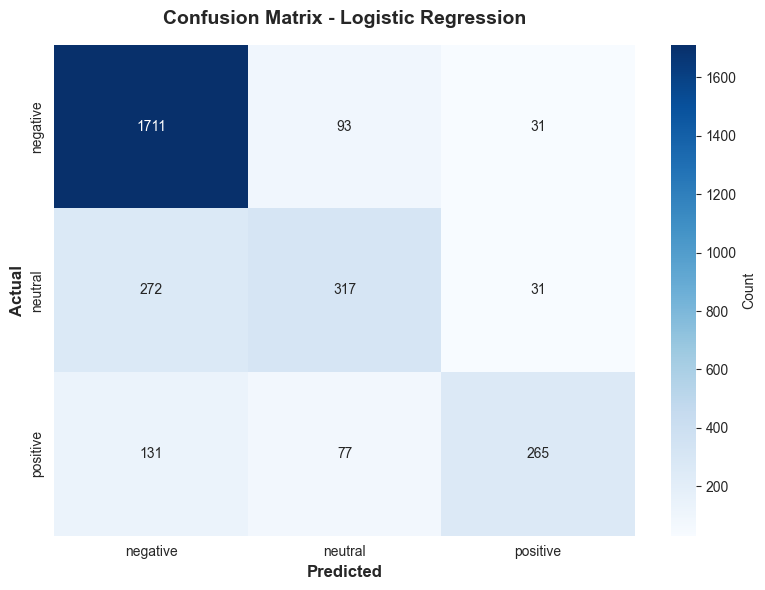

In [15]:
# Confusion Matrix
print("\n📈 Confusion Matrix - Logistic Regression:\n")
lr_cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lr_model.classes_, 
            yticklabels=lr_model.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
# Classification Report
print("\n📋 Classification Report - Logistic Regression:\n")
print(classification_report(y_test, lr_pred))


📋 Classification Report - Logistic Regression:

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      1835
     neutral       0.65      0.51      0.57       620
    positive       0.81      0.56      0.66       473

    accuracy                           0.78      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.78      0.77      2928



### 5.2 Naive Bayes

In [17]:
print("🤖 Training Naive Bayes Model...\n")

# Initialize and train
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)

print(f"✅ Naive Bayes trained successfully!")
print(f"📊 Accuracy: {nb_accuracy*100:.2f}%")

🤖 Training Naive Bayes Model...

✅ Naive Bayes trained successfully!
📊 Accuracy: 73.50%



📈 Confusion Matrix - Naive Bayes:



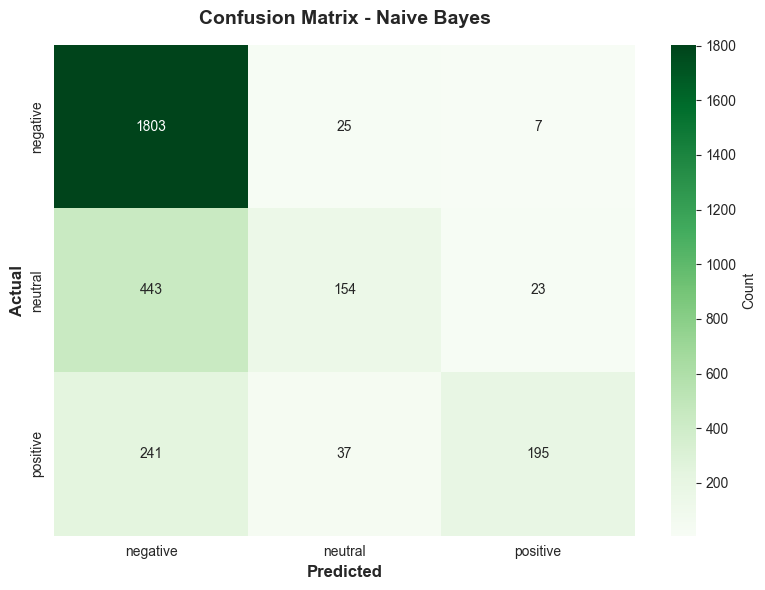

In [18]:
# Confusion Matrix
print("\n📈 Confusion Matrix - Naive Bayes:\n")
nb_cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=nb_model.classes_, 
            yticklabels=nb_model.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Naive Bayes', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
# Classification Report
print("\n📋 Classification Report - Naive Bayes:\n")
print(classification_report(y_test, nb_pred))


📋 Classification Report - Naive Bayes:

              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1835
     neutral       0.71      0.25      0.37       620
    positive       0.87      0.41      0.56       473

    accuracy                           0.73      2928
   macro avg       0.77      0.55      0.59      2928
weighted avg       0.75      0.73      0.69      2928



### 5.3 Support Vector Machine (SVM)

In [20]:
print("🤖 Training Support Vector Machine Model...\n")

# Initialize and train (using linear kernel for text classification)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"✅ SVM trained successfully!")
print(f"📊 Accuracy: {svm_accuracy*100:.2f}%")

🤖 Training Support Vector Machine Model...

✅ SVM trained successfully!
📊 Accuracy: 78.59%



📈 Confusion Matrix - SVM:



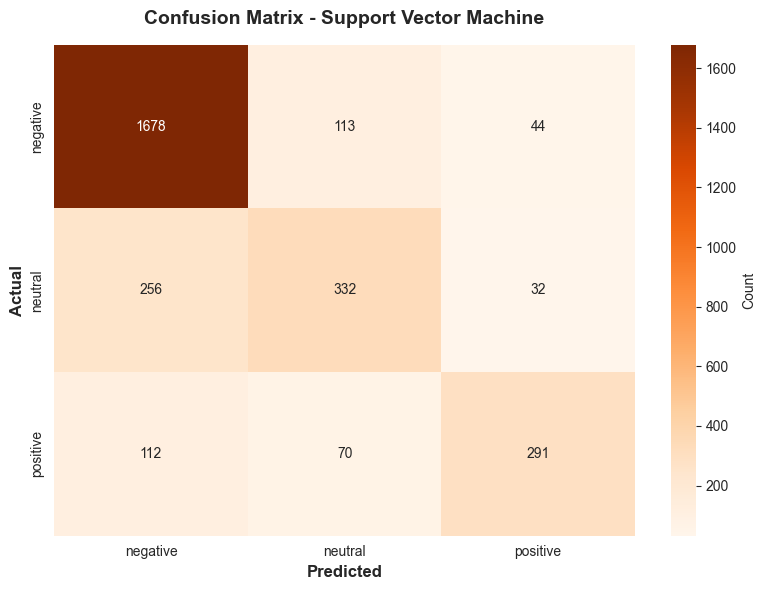

In [21]:
# Confusion Matrix
print("\n📈 Confusion Matrix - SVM:\n")
svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=svm_model.classes_, 
            yticklabels=svm_model.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Support Vector Machine', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [22]:
# Classification Report
print("\n📋 Classification Report - SVM:\n")
print(classification_report(y_test, svm_pred))


📋 Classification Report - SVM:

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1835
     neutral       0.64      0.54      0.59       620
    positive       0.79      0.62      0.69       473

    accuracy                           0.79      2928
   macro avg       0.75      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



## 6. Model Comparison

In [23]:
# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy': [lr_accuracy, nb_accuracy, svm_accuracy]
})

# Sort by accuracy
model_comparison = model_comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n🏆 Model Accuracy Comparison:\n")
print(model_comparison.to_string(index=False))
print(f"\n✨ Best Model: {model_comparison.iloc[0]['Model']} with {model_comparison.iloc[0]['Accuracy']*100:.2f}% accuracy")


🏆 Model Accuracy Comparison:

              Model  Accuracy
                SVM  0.785861
Logistic Regression  0.783128
        Naive Bayes  0.734973

✨ Best Model: SVM with 78.59% accuracy


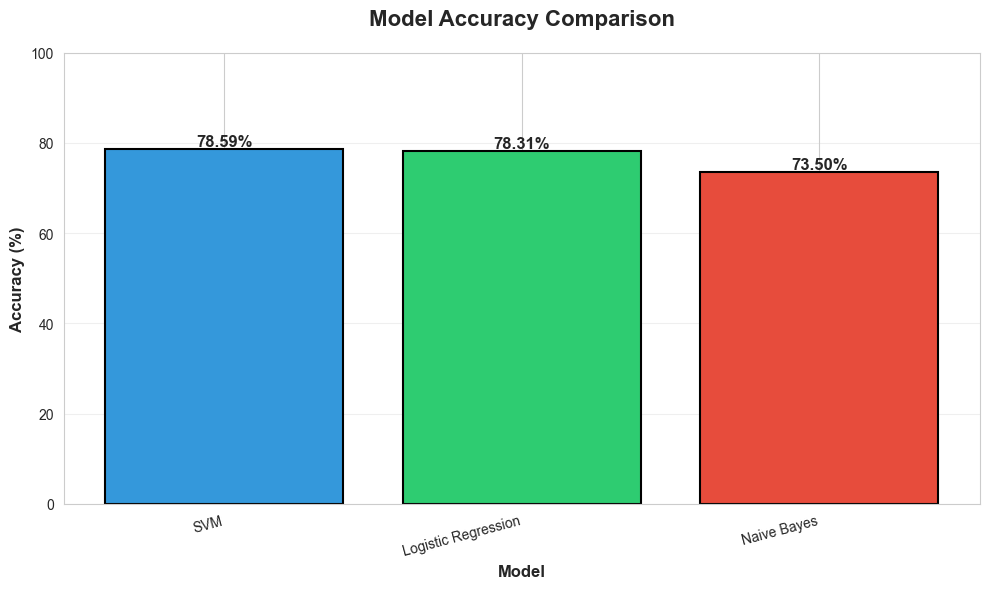

In [24]:
# Visualize model comparison
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#2ecc71', '#e74c3c']
bars = plt.bar(model_comparison['Model'], model_comparison['Accuracy']*100, 
               color=colors, edgecolor='black', linewidth=1.5)

plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Interactive Prediction System

Now you can input any custom airline review text and get sentiment predictions from the best model!

In [25]:
# Select the best model
best_model_name = model_comparison.iloc[0]['Model']

if best_model_name == 'Logistic Regression':
    best_model = lr_model
elif best_model_name == 'Naive Bayes':
    best_model = nb_model
else:
    best_model = svm_model

print(f"✨ Using the best model: {best_model_name}")

✨ Using the best model: SVM


In [26]:
def predict_sentiment(text, model, vectorizer):
    """
    Predict sentiment for a given text
    
    Args:
        text (str): Input text to classify
        model: Trained ML model
        vectorizer: Fitted TF-IDF vectorizer
    
    Returns:
        str: Predicted sentiment
    """
    # Preprocess the text
    cleaned = preprocess_text(text)
    
    # Vectorize
    vectorized = vectorizer.transform([cleaned])
    
    # Predict
    prediction = model.predict(vectorized)[0]
    
    return prediction

print("✅ Prediction function created!")

✅ Prediction function created!


In [27]:
# Example predictions
test_reviews = [
    "The flight was amazing! Great service and comfortable seats.",
    "Terrible experience. The flight was delayed for 5 hours.",
    "It was okay, nothing special but not bad either."
]

print("🔮 Example Predictions:\n")
print("="*70)

for i, review in enumerate(test_reviews, 1):
    sentiment = predict_sentiment(review, best_model, tfidf_vectorizer)
    print(f"\n{i}. Review: {review}")
    print(f"   Predicted Sentiment: {sentiment.upper()}")
    print("-"*70)

🔮 Example Predictions:


1. Review: The flight was amazing! Great service and comfortable seats.
   Predicted Sentiment: POSITIVE
----------------------------------------------------------------------

2. Review: Terrible experience. The flight was delayed for 5 hours.
   Predicted Sentiment: NEGATIVE
----------------------------------------------------------------------

3. Review: It was okay, nothing special but not bad either.
   Predicted Sentiment: NEGATIVE
----------------------------------------------------------------------


In [29]:
# Interactive prediction - YOU CAN MODIFY THIS TEXT!
custom_review = "VirginAmerica I love this graphic"

print("\n💬 Custom Review Prediction:\n")
print("="*70)
print(f"Review: {custom_review}")
print(f"Predicted Sentiment: {predict_sentiment(custom_review, best_model, tfidf_vectorizer).upper()}")
print("="*70)
print("\n✨ You can change the 'custom_review' variable above and re-run this cell to predict other reviews!")


💬 Custom Review Prediction:

Review: VirginAmerica I love this graphic
Predicted Sentiment: POSITIVE

✨ You can change the 'custom_review' variable above and re-run this cell to predict other reviews!


## 8. Summary and Conclusion

### What We Accomplished:
✅ Loaded and explored airline sentiment dataset  
✅ Preprocessed text using NLP techniques  
✅ Extracted features using TF-IDF vectorization  
✅ Trained 3 different ML models  
✅ Evaluated and compared model performance  
✅ Created an interactive prediction system  

### Key Takeaways:
- **Text Preprocessing** is crucial for good model performance
- **TF-IDF** effectively converts text to numerical features
- Different models have different strengths for text classification
- Model evaluation using multiple metrics provides comprehensive insights

### Next Steps:
- Fine-tune hyperparameters for better accuracy
- Try advanced techniques like Word2Vec or BERT
- Deploy the model as a web application
- Collect more data for improved performance